# Importing libraries and the title_akas dataset

In [1]:
library(ggplot2)
library(maps)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”


In [2]:
options(repr.plot.width=13, repr.plot.height=7, repr.plot.res = 150)

In [3]:
title_akas=read.delim('cleaned_filtered_title_akas.tsv')

# Do movies with more than 1 region have isOriginalTitle?

In [4]:
title_akas[title_akas$isOriginalTitle==1,] #Rows corresponding to the original titles
#There are only 6 rows with isOriginalTitle==1 and all of them correspond to different movies

,titleId,region,isOriginalTitle
,<chr>,<chr>,<int>
453799,tt0084222,XWW,1
978897,tt0986264,XWW,1
1497322,tt2558318,XWW,1
1534392,tt2838166,GB,1
1727209,tt5215088,US,1
1843724,tt7040678,BR,1


# Some experiments with maps

In [5]:
world=map_data("world") #Dataset with longitudes and latitudes of the world countries 

In [6]:
head(world);tail(world)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-69.89912,12.45200,1,1,Aruba,NA
2,-69.89571,12.42300,1,2,Aruba,NA
3,-69.94219,12.43853,1,3,Aruba,NA
4,-70.00415,12.50049,1,4,Aruba,NA
5,-70.06612,12.54697,1,5,Aruba,NA
6,-70.05088,12.59707,1,6,Aruba,NA


,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
100959,12.43916,41.89839,1627,100959,Vatican,enclave
100960,12.43838,41.90620,1627,100960,Vatican,enclave
100961,12.43057,41.90547,1627,100961,Vatican,enclave
100962,12.42754,41.90073,1627,100962,Vatican,enclave
100963,12.43057,41.89756,1627,100963,Vatican,enclave
100964,12.43916,41.89839,1627,100964,Vatican,enclave


# Countries Latitude and Longitude Dataset

In [7]:
countries=read.csv('countries_latitude_longitude.csv')
#https://www.kaggle.com/paultimothymooney/latitude-and-longitude-for-every-country-and-state

In [8]:
#Some of the attributes are useless for our purposes, so let's remove them
countries$usa_state_code=NULL
countries$usa_state_latitude=NULL
countries$usa_state_longitude=NULL
countries$usa_state=NULL

In [9]:
title_akas_regions=unique(title_akas$region) #unique regions

#Which regions from the title_akas are not in the countries dataset?
diff=setdiff(title_akas_regions,countries$country_code)

diff
#Some of those are not even countries: XEU represents Europe, XNA represents North America, etc. This, according
#to the site: https://community-imdb.sprinklr.com/conversations/data-issues-policy-discussions/what-does-these
#-new-region-codes-like-xww-xwg-etc-stand-for/5f8c562849d3ca0f27800e68?commentId=5f8c62ad35f40c45ff575b64

[1] "XWW"  "XEU"  "XYU"  "CSHH" "XWG"  "XSA"  "SUHH" "DDDE" "XKO"  "XSI" 
[11] "YUCS" "BUMM" "XPI"  "VDVN" "XAS"  "CSXX" "ZRCD" "XKV"  "XNA"

In [10]:
#Which rows of title_akas have the value of the attribute region equal to some element of the vector diff?

how_many=title_akas[is.element(title_akas$region, diff),]
nrow(how_many)/nrow(title_akas)

#This is just around 8% of the rows. Ufff! Grand! Let's work without those rows then

[1] 0.08150778

In [11]:
title_akas_clean=title_akas[!is.element(title_akas$region, diff),] #title_akas without regions in the vector diff

In [12]:
#Fatima's code
regions_frequency = table(title_akas_clean$region)
regions_frequency = as.data.frame(regions_frequency)
names(regions_frequency)[names(regions_frequency) == "Var1"]="country_code" #Changing the name of the Var1 column

In [13]:
regions=merge(regions_frequency,countries,by='country_code',all.x=T)

In [14]:
head(regions)

,country_code,Freq,latitude,longitude,country
,<fct>,<int>,<dbl>,<dbl>,<chr>
1,AD,22,42.54624,1.601554,Andorra
2,AE,711,23.42408,53.847818,United Arab Emirates
3,AF,98,33.93911,67.709953,Afghanistan
4,AG,12,17.06082,-61.796428,Antigua and Barbuda
5,AL,1335,41.15333,20.168331,Albania
6,AM,277,40.06910,45.038189,Armenia


# Let's make some graphics 

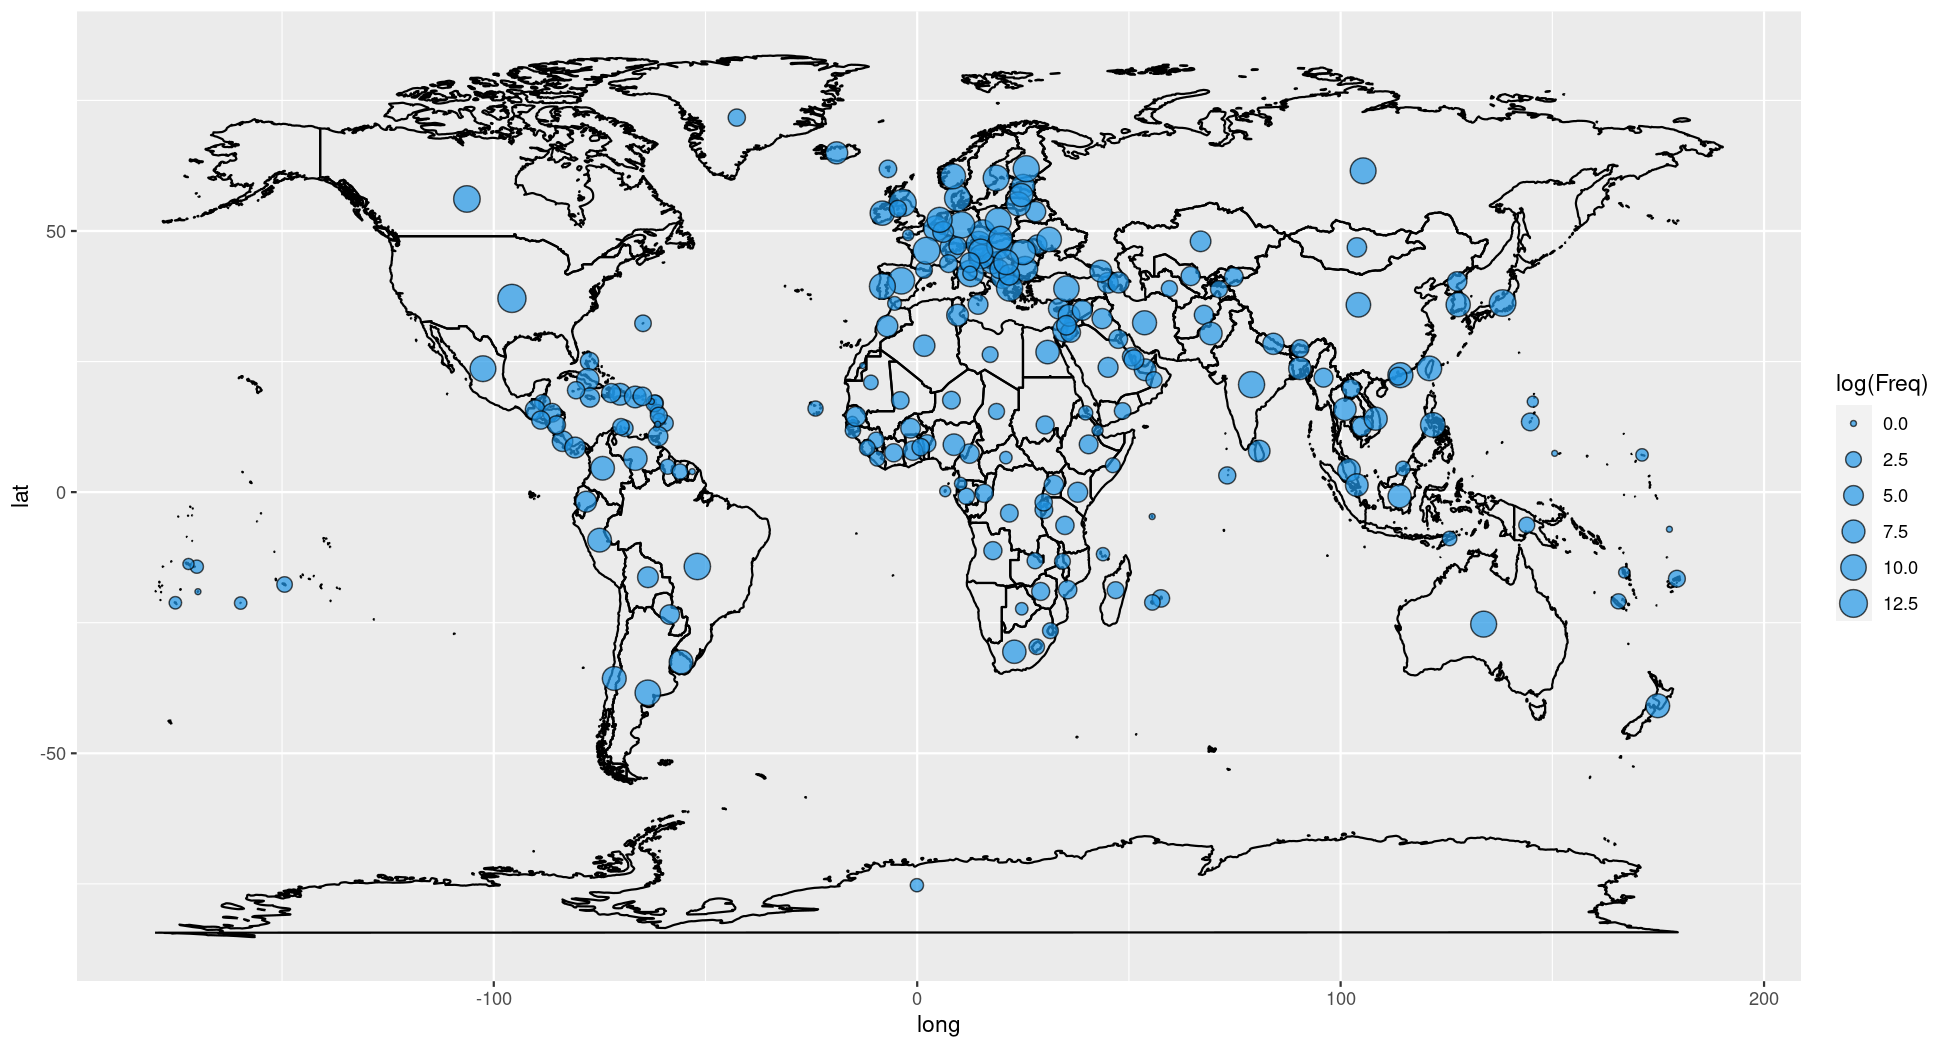

In [15]:
ggplot(world, aes(x=long, y=lat,group=group)) +
    geom_path() +
    geom_point(data=regions,aes(x=longitude,y=latitude,size=log(Freq)),shape=21,fill=4,alpha=.7,inherit.aes = FALSE) + 
    scale_size_continuous()

#It's important to use inherit.aes=FALSE! the region dataset doesn't have the attribute group

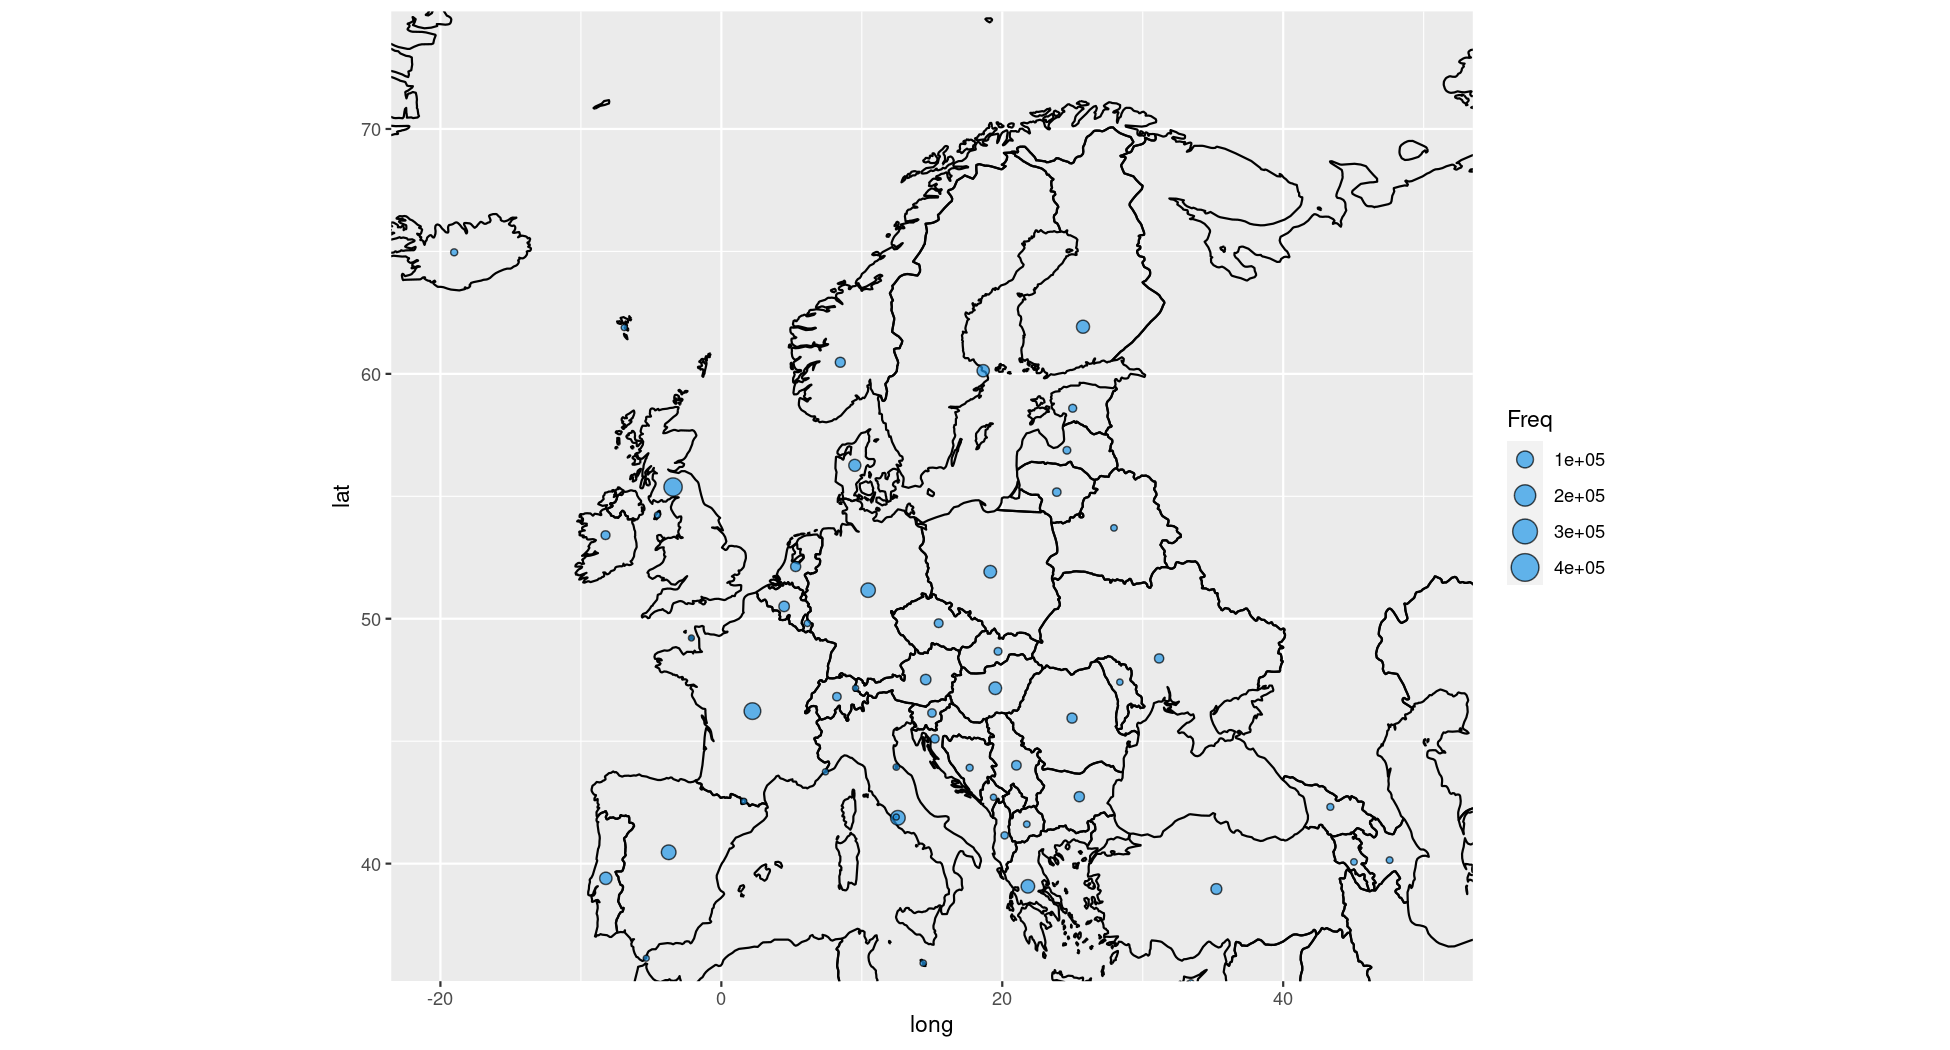

In [16]:
ggplot(world, aes(x=long, y=lat,group=group)) +
    geom_path() +
    geom_point(data=regions,aes(x=longitude,y=latitude,size=Freq),shape=21,fill=4,alpha=.7,inherit.aes = FALSE)+
    coord_quickmap(xlim=c(-20,50),ylim=c(37,73))

# Let's use the continents dataset to add some color to the plots

In [17]:
continents=read.csv('continents.csv')
# https://datahub.io/JohnSnowLabs/country-and-continent-codes-list

In [18]:
continents$Three_Letter_Country_Code=NULL
continents$Country_Number=NULL
continents$Country_Name=NULL

In [19]:
#Changing the name to do the merge
names(continents)[names(continents) == "Two_Letter_Country_Code"]="country_code"

In [20]:
#Merging
regions=merge(regions,continents,by='country_code',all.x=T)

#Now, we have 223 rows: 8 more than what we had... This is because some countries have two continents associated with them

## The plots above don't show the difference in the number of movies transated very well. Notice that, the US have more than 400 000 movies and France less than 100 000 movies. However, the area of their circles is unoticable...

## Let's change this!

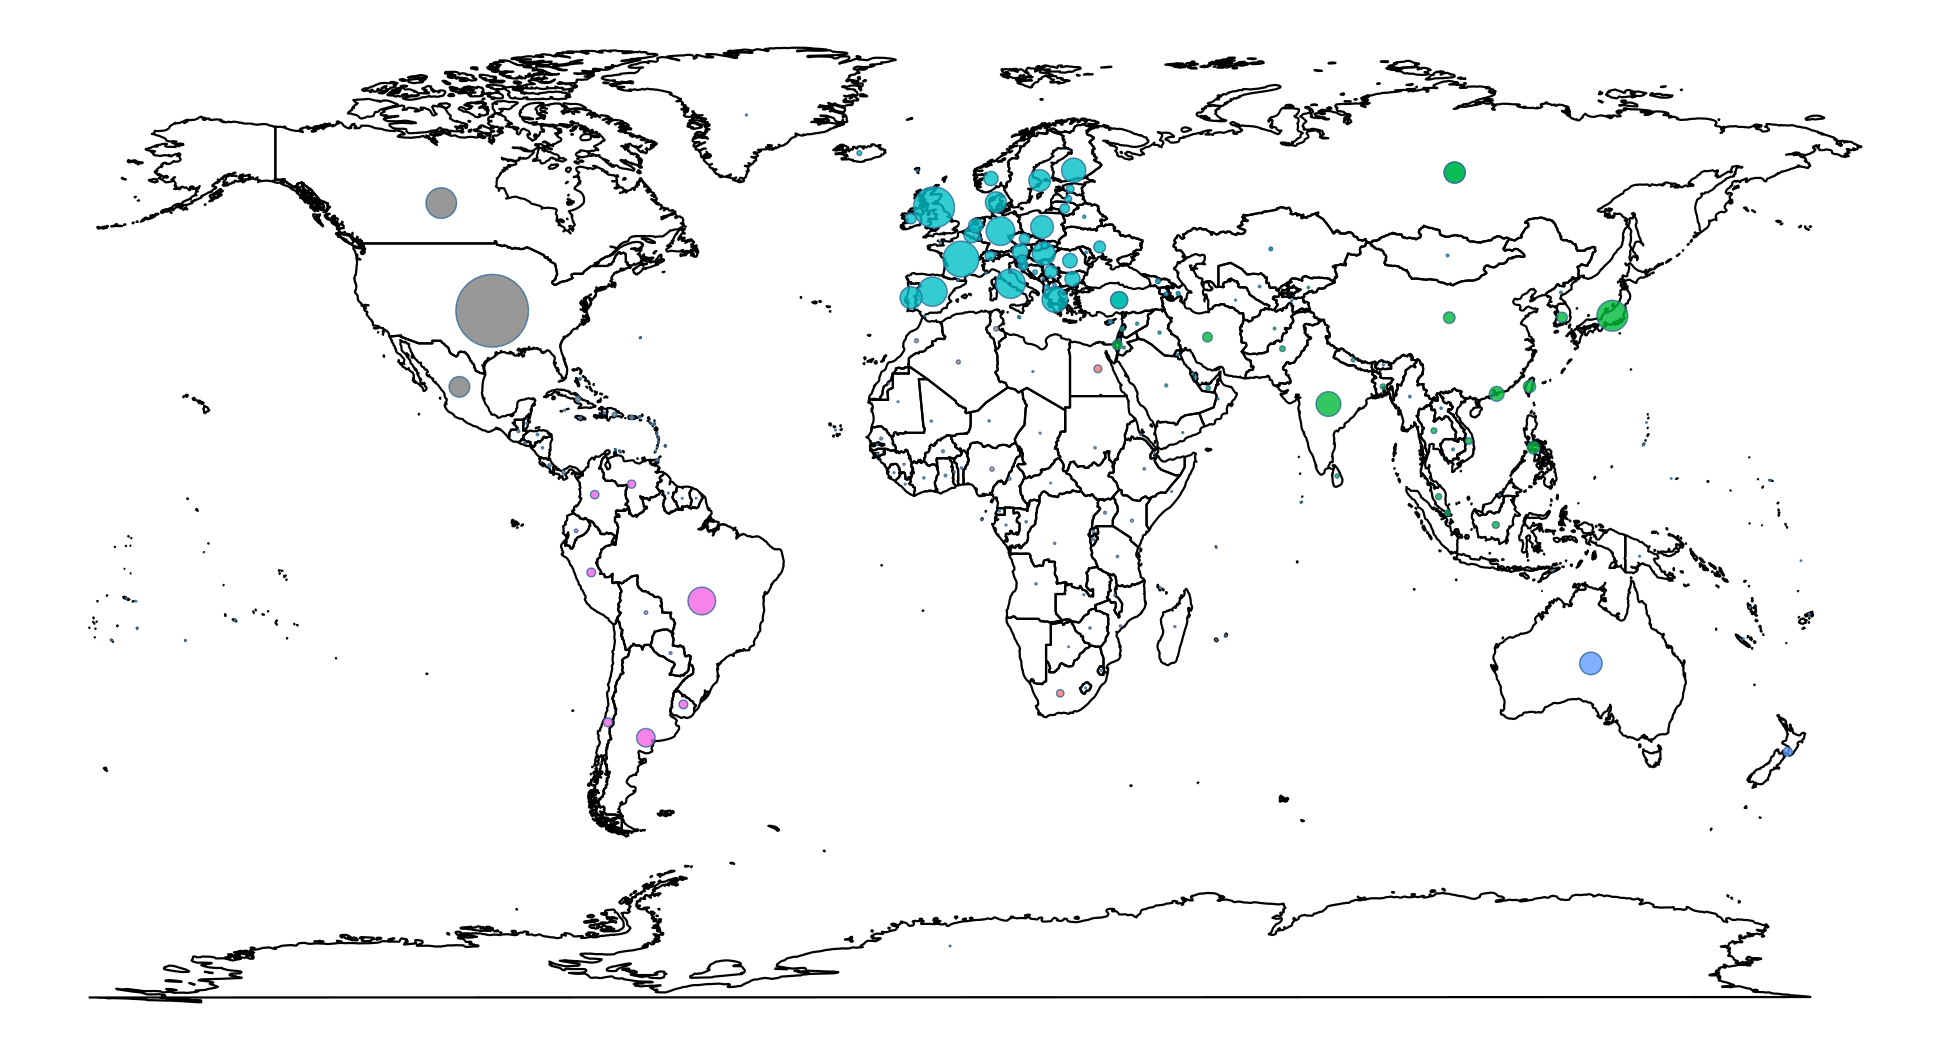

In [21]:
ggplot(world, aes(x=long, y=lat,group=group)) +
    geom_polygon(fill='white') +
    geom_path() +
    geom_point(data=regions,aes(x=longitude,y=latitude,size=Freq,color=1,
               fill=Continent_Code),shape=21,alpha=.8,inherit.aes = FALSE) + 
    scale_size_area(breaks=10,max_size = 16) + #Adjusting the area to represent the difference in translated movies
    theme_void() + #Removing the axis
    theme(legend.position = "none", #Removing the legend and the stupid lines
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          panel.grid.major.y = element_blank(),
          panel.grid.minor.y = element_blank())

#It's important to use inherit.aes=FALSE! the region dataset doesn't have the attribute group

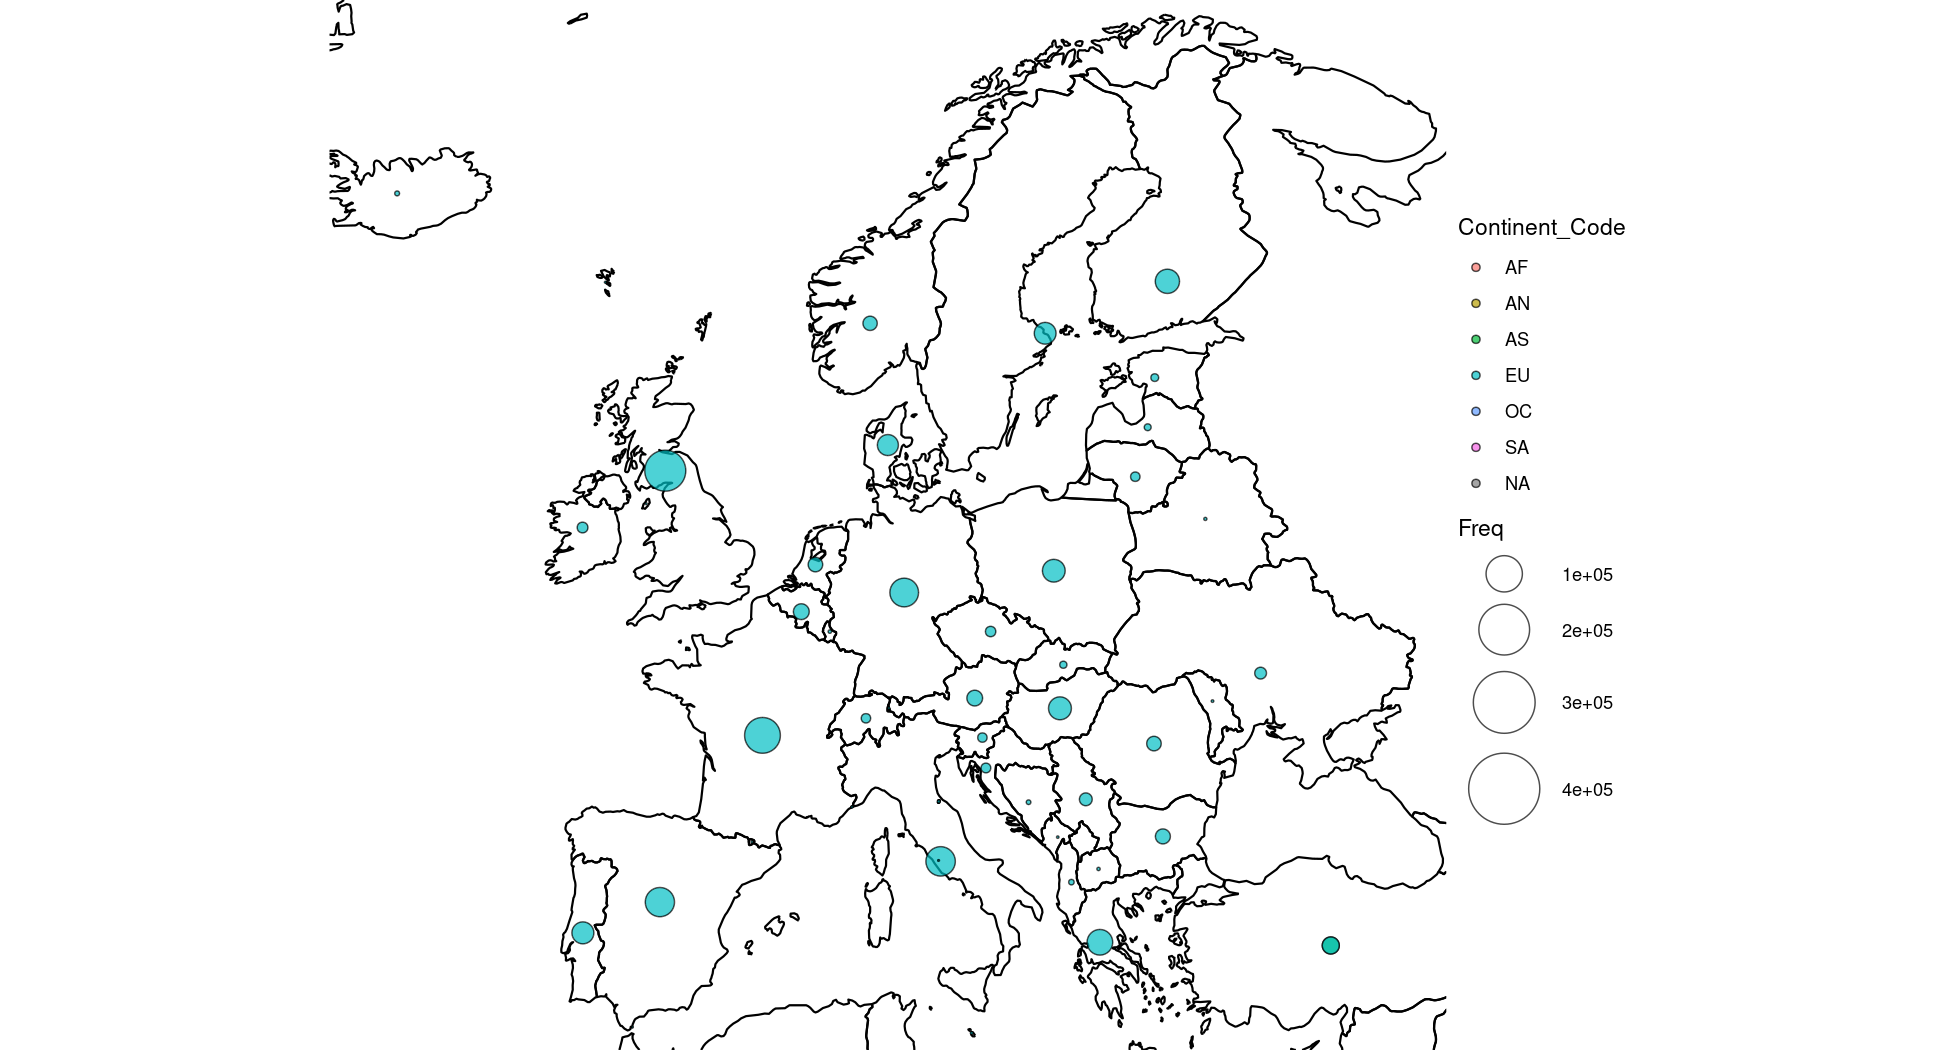

In [22]:
ggplot(world, aes(x=long, y=lat,group=group)) +
    geom_path() +
    geom_point(data=regions,aes(x=longitude,y=latitude,size=Freq,fill=Continent_Code),shape=21,alpha=.7,inherit.aes = FALSE) + 
    scale_size_area(max_size = 16) +
    theme_void() +
    theme(#legend.position = "none",
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          panel.grid.major.y = element_blank(),
          panel.grid.minor.y = element_blank()) +
    coord_quickmap(xlim=c(-20,39),ylim=c(37,70))

#It's important to use inherit.aes=FALSE! the region dataset doesn't have the attribute group

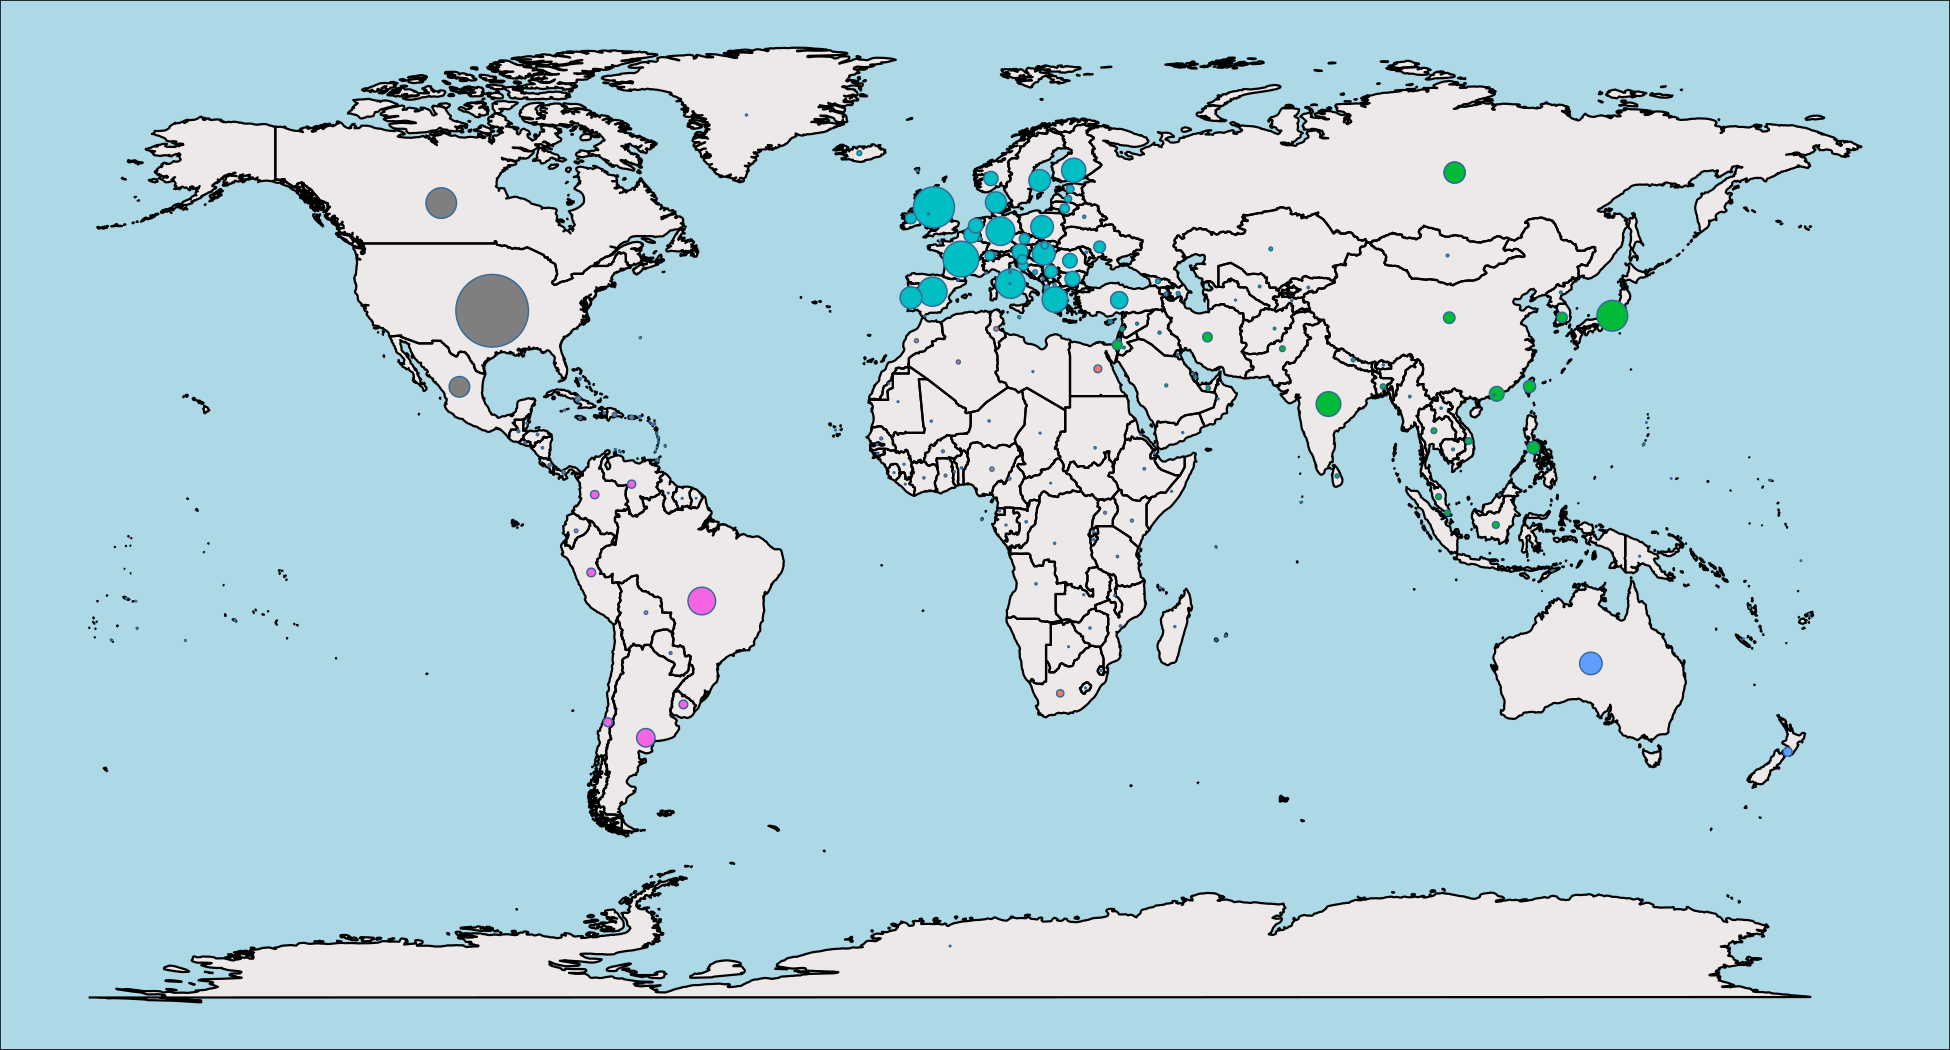

In [23]:
ggplot(world, aes(x=long, y=lat,group=group)) +
    geom_polygon(fill='snow2') +
    geom_path() +
    geom_point(data=regions,aes(x=longitude,y=latitude,size=Freq,color=1,alpha=.6,
               fill=Continent_Code),shape=21,alpha=1,inherit.aes = FALSE) + 
    scale_size_area(breaks=10,max_size = 16) + #Adjusting the area to represent the difference in translated movies
    theme_void() + #Removing the axis
    theme(panel.background = element_rect(fill = 'lightblue')) + #adding color to the background
    theme(legend.position = "none", #Removing the legend and the stupid lines
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          panel.grid.major.y = element_blank(),
          panel.grid.minor.y = element_blank())

#It's important to use inherit.aes=FALSE! the region dataset doesn't have the attribute group

# Let's bring the merge_basics_rating_crew dataset

In [24]:
merged=read.delim('../merge_basics_ratings_crew.tsv')

In [25]:
head(merged)

,tconst,titleType,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3,averageRating,numVotes,n_directors,n_writers
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
1,tt0000001,short,0,1894,1,Documentary,Short,0,5.6,1654,1,1
2,tt0000002,short,0,1892,5,Animation,Short,0,6.1,199,1,1
3,tt0000003,short,0,1892,4,Animation,Comedy,Romance,6.5,1366,1,1
4,tt0000004,short,0,1892,12,Animation,Short,0,6.2,121,1,1
5,tt0000005,short,0,1893,1,Comedy,Short,0,6.2,2149,1,1
6,tt0000006,short,0,1894,1,Short,0,0,5.3,115,1,1


In [26]:
head(regions)

,country_code,Freq,latitude,longitude,country,Continent_Name,Continent_Code
,<fct>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,AD,22,42.54624,1.601554,Andorra,Europe,EU
2,AE,711,23.42408,53.847818,United Arab Emirates,Asia,AS
3,AF,98,33.93911,67.709953,Afghanistan,Asia,AS
4,AG,12,17.06082,-61.796428,Antigua and Barbuda,North America,NA
5,AL,1335,41.15333,20.168331,Albania,Europe,EU
6,AM,277,40.06910,45.038189,Armenia,Asia,AS


In [27]:
head(title_akas)

,titleId,region,isOriginalTitle
,<chr>,<chr>,<int>
1,tt0000001,UA,0
2,tt0000001,DE,0
3,tt0000001,HU,0
4,tt0000001,GR,0
5,tt0000001,RU,0
6,tt0000001,US,0


In [31]:
ids = as.data.frame(table(title_akas$titleId)) #Fatima's code

In [34]:
names(ids)[names(ids) == "Var1"]="tconst" #Changing the name of the Var1 column

In [41]:
length(setdiff(ids$tconst,merged$tconst))
#97693 movies in the ids dataset are not in the merged dataset

[1] 97693

In [44]:
merged=merge(merged,ids,by='tconst',all.x=TRUE) #Let's merge them

# Analyzing the movies with ratings

In [48]:
movies_ratings=subset(merged,averageRating>0 & !is.na(Freq))

In [49]:
nrow(movies_ratings)

[1] 276301

In [50]:
head(movies_ratings)

,tconst,titleType,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3,averageRating,numVotes,n_directors,n_writers,Freq
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>
1,tt0000001,short,0,1894,1,Documentary,Short,0,5.6,1654,1,1,7
2,tt0000002,short,0,1892,5,Animation,Short,0,6.1,199,1,1,7
3,tt0000003,short,0,1892,4,Animation,Comedy,Romance,6.5,1366,1,1,8
4,tt0000004,short,0,1892,12,Animation,Short,0,6.2,121,1,1,6
5,tt0000005,short,0,1893,1,Comedy,Short,0,6.2,2149,1,1,10
6,tt0000006,short,0,1894,1,Short,0,0,5.3,115,1,1,5


In [51]:
movies_ratings[order(movies_ratings$startYear),]

,tconst,titleType,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3,averageRating,numVotes,n_directors,n_writers,Freq
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>
819227,tt3155794,short,0,1874,1,Documentary,Short,0,6.9,1231,1,1,9
503935,tt12592084,short,0,1878,1,Animation,Short,0,6.0,29,1,1,1
719876,tt2221420,short,0,1878,1,Documentary,Short,0,7.4,2410,1,1,4
1016026,tt5459794,short,0,1883,1,Documentary,Short,0,6.4,735,1,1,2
694044,tt2075247,short,0,1887,1,Documentary,Short,0,5.2,1115,1,1,2
233535,tt0343112,short,0,1888,0,Documentary,Short,0,6.7,2760,1,1,4
634911,tt1758563,short,0,1888,1,Documentary,Short,0,5.5,1112,1,1,3
701917,tt2116853,short,0,1888,-1,Documentary,Short,0,5.7,106,1,1,1
701939,tt2116898,short,0,1889,-1,Short,0,0,5.4,195,1,1,1


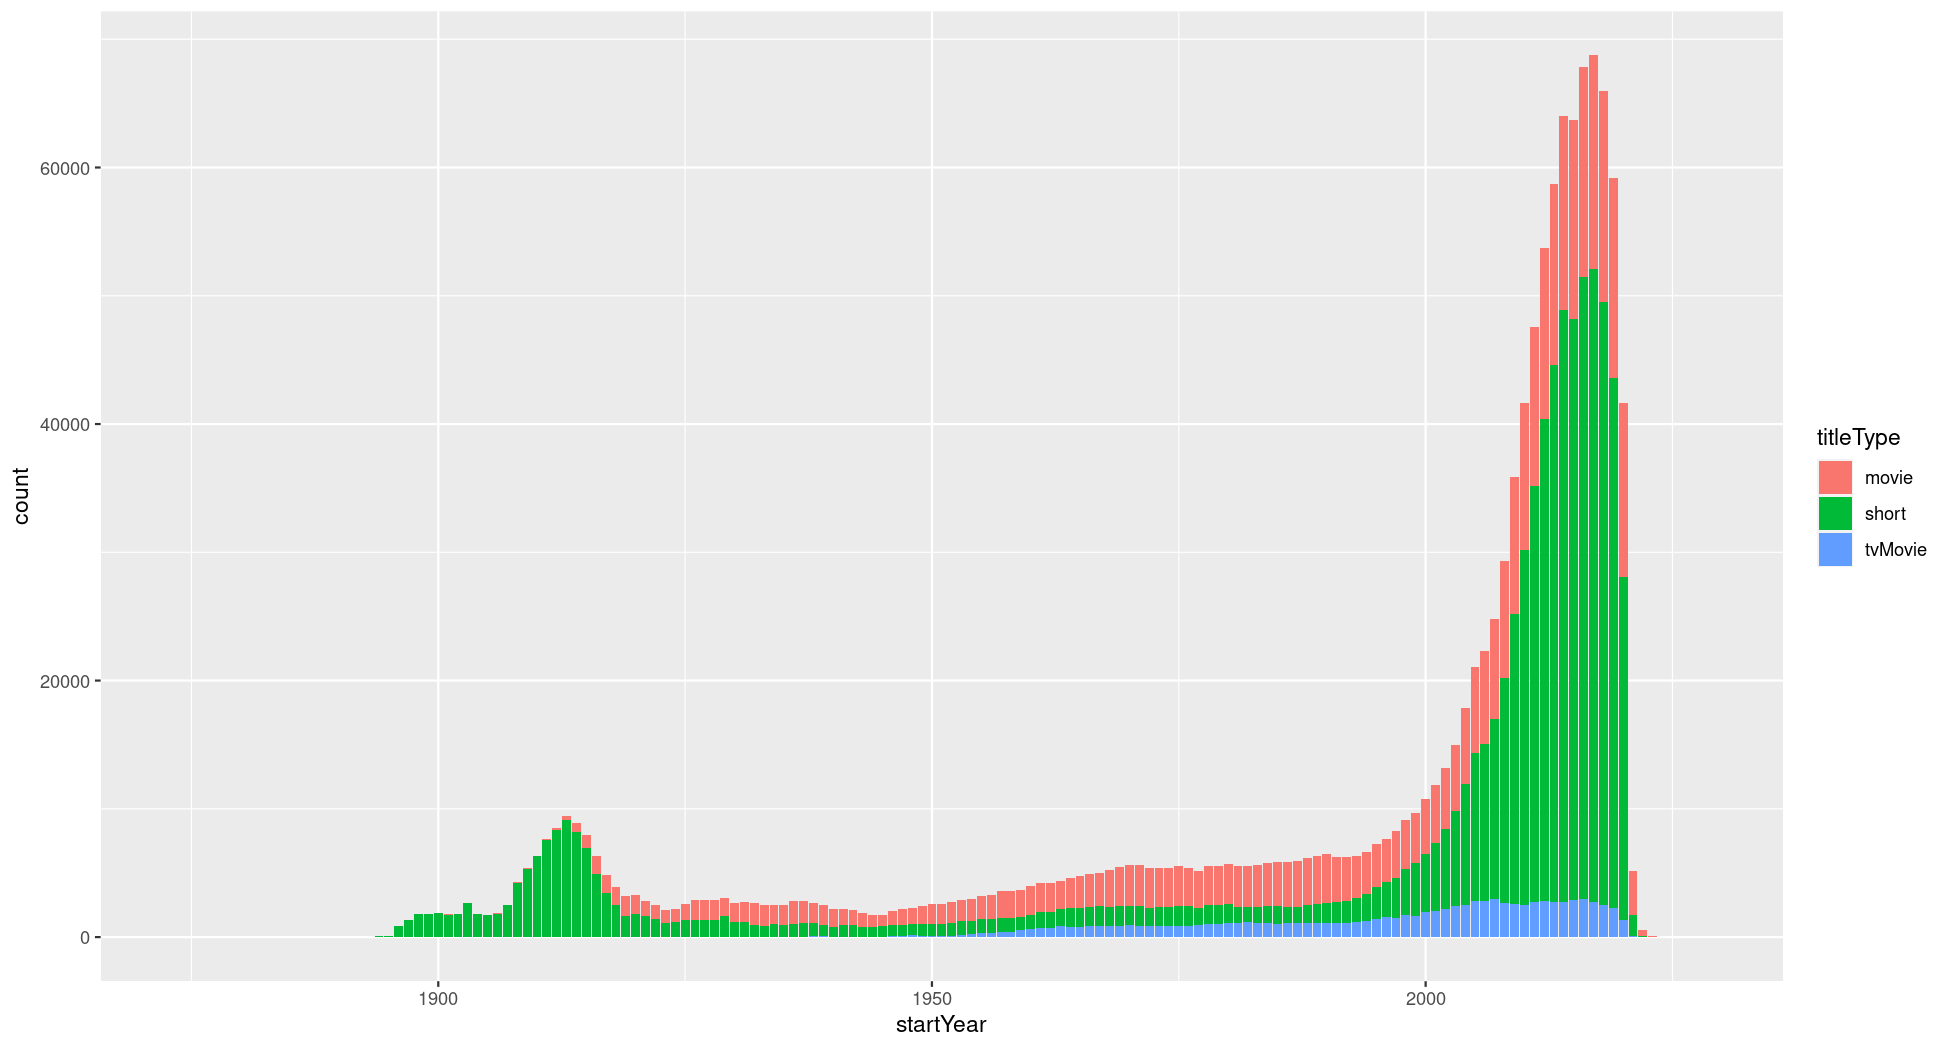

In [62]:
ggplot(merged,aes(x=startYear))+
    geom_bar(aes(fill=titleType))